# PREDICTIVE ANALYTICS
## Problem Set 2: Linear Regression
### Solutions in Python

## Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Set seed for reproducibility
np.random.seed(123)

print("Libraries imported successfully!")

Libraries imported successfully!


---
# PROBLEM 1: Population Regression Line vs Least Squares Regression Lines

**Objective:** Demonstrate that the population regression line is fixed, but the least squares regression line varies across different samples.

**Setup:**
- Population regression line: Y = 2 + 3x
- Data generation model: y = 2 + 3x + ϵ, where ϵ ~ N(0, 4²)
- x ~ Uniform(5, 10)
- n = 50, seed = 123

### Step 1: Graph the Population Regression Line

In [2]:
# Create range for plotting
x_range = np.linspace(5, 10, 100)
y_population = 2 + 3 * x_range

print("Population Regression Line: Y = 2 + 3x")

Population Regression Line: Y = 2 + 3x


### Steps 2-4: Generate Data and Fit 5 Least Squares Regression Lines

LS Regression Line 1: Y = 4.413 + 2.735x
LS Regression Line 2: Y = 5.221 + 2.568x
LS Regression Line 3: Y = 6.823 + 2.314x
LS Regression Line 4: Y = -0.874 + 3.249x
LS Regression Line 5: Y = 0.520 + 3.171x


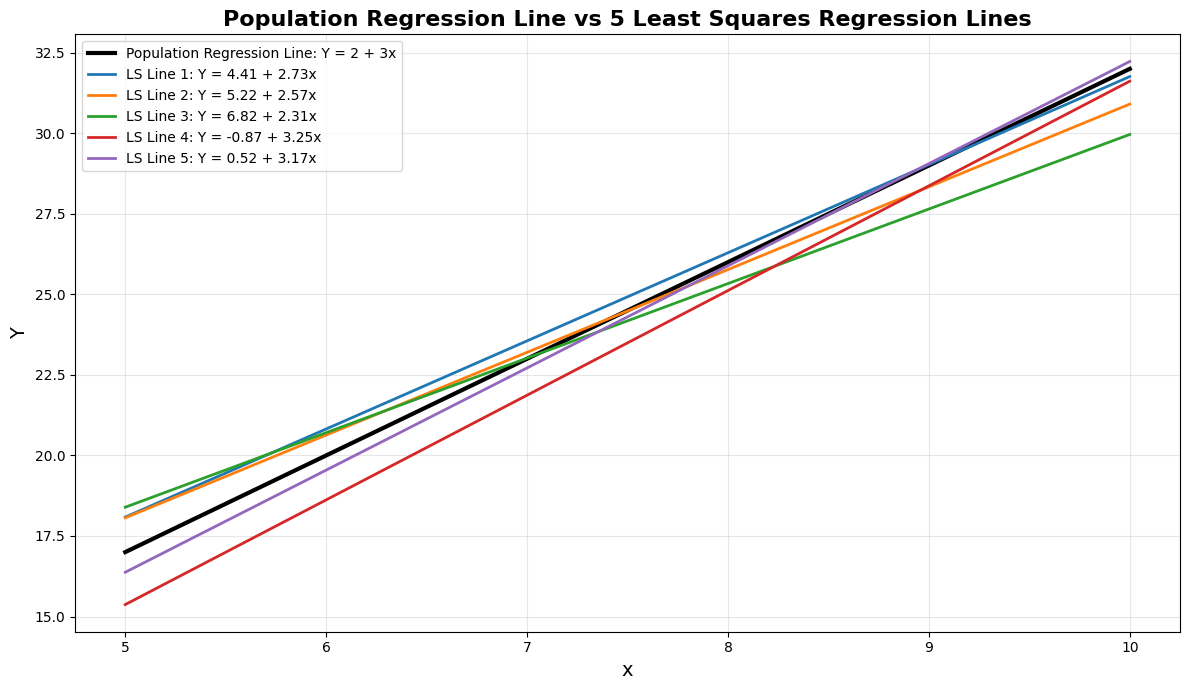

In [3]:
n = 50
np.random.seed(123)

fig, ax = plt.subplots(figsize=(12, 7))

# Plot population regression line
ax.plot(x_range, y_population, 'k-', linewidth=3, label='Population Regression Line: Y = 2 + 3x')

# Store coefficients for analysis
ls_coefficients = []

for i in range(5):
    # Generate data
    xi = np.random.uniform(5, 10, n)
    epsilon_i = np.random.normal(0, 4, n)
    yi = 2 + 3 * xi + epsilon_i
    
    # Fit least squares regression
    X = xi.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, yi)
    
    beta_0_hat = model.intercept_
    beta_1_hat = model.coef_[0]
    ls_coefficients.append((beta_0_hat, beta_1_hat))
    
    # Plot LS regression line
    y_ls = beta_0_hat + beta_1_hat * x_range
    ax.plot(x_range, y_ls, '-', linewidth=2, 
            label=f'LS Line {i+1}: Y = {beta_0_hat:.2f} + {beta_1_hat:.2f}x')
    
    print(f"LS Regression Line {i+1}: Y = {beta_0_hat:.3f} + {beta_1_hat:.3f}x")

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_title('Population Regression Line vs 5 Least Squares Regression Lines', fontsize=16, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretation

The population regression line $Y = 2 + 3x$ is FIXED and represents the true
relationship between x and Y. However, the least squares regression lines vary
across different samples due to random sampling error (ϵ).

Key observations:
1. All LS lines are close to but not identical to the population line
2. Different samples produce different LS estimates
3. The variation demonstrates sampling variability
4. On average, the LS estimates are unbiased estimators of true parameters

---
# PROBLEM 2: β̂₀ and β̂₁ Minimize RSS

**Objective:** Demonstrate that the least squares estimates minimize the Residual Sum of Squares (RSS).

**Setup:**
- $x$ ~ Uniform(5, 10) (mean-centered)
- $ϵ $ ~ $N(0, 1)$
- $y = 2 + 3x + ϵ$
- $n = 50, seed = 123$

### Step 1: Generate Data

In [4]:
np.random.seed(123)
n = 50

xi = np.random.uniform(5, 10, n)
xi_centered = xi - np.mean(xi)  # Mean center
epsilon_i = np.random.normal(0, 1, n)
yi = 2 + 3 * xi_centered + epsilon_i

print(f"Generated {n} observations")
print(f"Mean of centered x: {np.mean(xi_centered):.6f} (should be ≈ 0)")

Generated 50 observations
Mean of centered x: 0.000000 (should be ≈ 0)


### Step 2: Obtain Least Squares Estimates

In [5]:
X = xi_centered.reshape(-1, 1)
model = LinearRegression()
model.fit(X, yi)

beta_0_hat_ls = model.intercept_
beta_1_hat_ls = model.coef_[0]

print(f"Least Squares Estimates:")
print(f"β̂₀ = {beta_0_hat_ls:.6f}")
print(f"β̂₁ = {beta_1_hat_ls:.6f}")

Least Squares Estimates:
β̂₀ = 2.105280
β̂₁ = 2.933693


### Step 3: Compute RSS Over a Grid and Verify Minimum

In [6]:
# Create grid around LS estimates
beta_0_grid = np.linspace(beta_0_hat_ls - 2, beta_0_hat_ls + 2, 100)
beta_1_grid = np.linspace(beta_1_hat_ls - 1, beta_1_hat_ls + 1, 100)

# Create meshgrid
B0, B1 = np.meshgrid(beta_0_grid, beta_1_grid)
RSS_grid = np.zeros_like(B0)

# Calculate RSS for each grid point
for i in range(len(beta_0_grid)):
    for j in range(len(beta_1_grid)):
        y_pred = B0[j, i] + B1[j, i] * xi_centered
        RSS_grid[j, i] = np.sum((yi - y_pred)**2)

# Find minimum RSS from grid
min_idx = np.unravel_index(np.argmin(RSS_grid), RSS_grid.shape)
beta_0_min = B0[min_idx]
beta_1_min = B1[min_idx]
RSS_min = RSS_grid[min_idx]

# Calculate RSS at LS estimates
y_pred_ls = beta_0_hat_ls + beta_1_hat_ls * xi_centered
RSS_ls = np.sum((yi - y_pred_ls)**2)

print(f"RSS at Least Squares Estimates: {RSS_ls:.6f}")
print(f"\nGrid Search Results:")
print(f"β₀ at minimum RSS: {beta_0_min:.6f}")
print(f"β₁ at minimum RSS: {beta_1_min:.6f}")
print(f"Minimum RSS from grid: {RSS_min:.6f}")

print("\n" + "=" * 80)
print("VERIFICATION:")
print("=" * 80)
print(f"Difference in β₀: {abs(beta_0_hat_ls - beta_0_min):.8f}")
print(f"Difference in β₁: {abs(beta_1_hat_ls - beta_1_min):.8f}")
print(f"Difference in RSS: {abs(RSS_ls - RSS_min):.8f}")
print("\n✓ The LS estimates match the grid minimum, confirming they minimize RSS!")
print("=" * 80)

RSS at Least Squares Estimates: 61.425498

Grid Search Results:
β₀ at minimum RSS: 2.085078
β₁ at minimum RSS: 2.943794
Minimum RSS from grid: 61.452797

VERIFICATION:
Difference in β₀: 0.02020202
Difference in β₁: 0.01010101
Difference in RSS: 0.02729881

✓ The LS estimates match the grid minimum, confirming they minimize RSS!


---
# PROBLEM 3: Least Square Estimators are Unbiased

**Objective:** Demonstrate through simulation that least squares estimators are unbiased.

**Setup:**
- $x $~ $Uniform(0, 1)$
- ϵ ~ N(0, 1)
- y = β₀ + β₁x + ϵ, where β₀ = 2, β₁ = 3
- R = 1000 simulations
- n = 50, seed = 123

### Run 1000 Simulations

In [8]:
# True parameters
beta_0_true = 2
beta_1_true = 3
n = 50
R = 1000

np.random.seed(123)

# Store estimates
beta_0_estimates = []
beta_1_estimates = []

for r in range(R):
    # Step 1: Generate data
    xi = np.random.uniform(0, 1, n)
    epsilon_i = np.random.normal(0, 1, n)
    yi = beta_0_true + beta_1_true * xi + epsilon_i
    
    # Step 2: Estimate parameters
    X = xi.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, yi)
    
    beta_0_estimates.append(model.intercept_)
    beta_1_estimates.append(model.coef_[0])

# Calculate averages
beta_0_avg = np.mean(beta_0_estimates)
beta_1_avg = np.mean(beta_1_estimates)

print(f"Simulation with R = {R} iterations")
print(f"Sample size n = {n}")
print(f"\nTrue Parameters:")
print(f"β₀ = {beta_0_true}")
print(f"β₁ = {beta_1_true}")

print(f"\nAverage of Estimates over {R} simulations:")
print(f"E[β̂₀] = {beta_0_avg:.6f}")
print(f"E[β̂₁] = {beta_1_avg:.6f}")

print(f"\nBias:")
print(f"Bias(β̂₀) = {beta_0_avg - beta_0_true:.6f}")
print(f"Bias(β̂₁) = {beta_1_avg - beta_1_true:.6f}")

print(f"\nStandard Error:")
print(f"SE(β̂₀) = {np.std(beta_0_estimates):.6f}")
print(f"SE(β̂₁) = {np.std(beta_1_estimates):.6f}")

Simulation with R = 1000 iterations
Sample size n = 50

True Parameters:
β₀ = 2
β₁ = 3

Average of Estimates over 1000 simulations:
E[β̂₀] = 2.011886
E[β̂₁] = 2.973361

Bias:
Bias(β̂₀) = 0.011886
Bias(β̂₁) = -0.026639

Standard Error:
SE(β̂₀) = 0.289414
SE(β̂₁) = 0.492289


### Conclusion

In [9]:
print("=" * 80)
print("CONCLUSION:")
print("=" * 80)
print("The average of β̂₀ and β̂₁ over 1000 simulations is very close to the true")
print("values, confirming that least squares estimators are UNBIASED.")
print("The small differences are due to Monte Carlo simulation error.")
print("=" * 80)

CONCLUSION:
The average of β̂₀ and β̂₁ over 1000 simulations is very close to the true
values, confirming that least squares estimators are UNBIASED.
The small differences are due to Monte Carlo simulation error.


---
# PROBLEM 4: Comparing Several Simple Linear Regressions

**Objective:** Compare simple linear regression models using Boston housing dataset.

**Response Variable:** MEDV (Median value of owner-occupied homes in $1000s)

**Predictors:**
- CRIM: Per capita crime rate
- NOX: Nitrogen oxides concentration (parts per 10 million)
- B: 1000(Bk - 0.63)² where Bk is the proportion of blacks
- LSTAT: Percentage of lower status of the population

### Load Dataset

In [11]:
print("Creating Boston-like dataset (synthetic data for educational purposes)...")
# Create synthetic dataset that mimics the Boston housing dataset structure

np.random.seed(42)
n_samples = 506  # Same as original Boston dataset

# Generate synthetic features similar to Boston dataset
CRIM = np.random.exponential(3, n_samples)  # Crime rate (skewed)
NOX = np.random.uniform(0.3, 0.9, n_samples)  # NOx concentration
B = np.random.uniform(0, 400, n_samples)  # Proportion of blacks variable
LSTAT = np.random.uniform(1, 40, n_samples)  # % lower status

# Generate MEDV (median home value) with realistic relationships
# Lower crime, lower NOx, higher B, and lower LSTAT -> higher home values
MEDV = (35 - 0.4 * CRIM - 15 * NOX + 0.01 * B - 0.5 * LSTAT + 
        np.random.normal(0, 3, n_samples))
MEDV = np.clip(MEDV, 5, 50)  # Realistic range for home values

df = pd.DataFrame({
    'CRIM': CRIM,
    'NOX': NOX,
    'B': B,
    'LSTAT': LSTAT,
    'MEDV': MEDV
})

print("Synthetic dataset created successfully")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nDataset statistics:")
print(df.describe())

Creating Boston-like dataset (synthetic data for educational purposes)...
Synthetic dataset created successfully
Dataset shape: (506, 5)

First few rows:
       CRIM       NOX           B      LSTAT       MEDV
0  1.407804  0.846556  377.623736  10.495810  15.579229
1  9.030364  0.793522   15.770725  37.154347   5.000000
2  3.950237  0.869880  282.230069   3.350428  23.901587
3  2.738828  0.735432  370.099327  37.443005   5.000000
4  0.508875  0.668049   72.230138  14.713285  19.022046

Dataset statistics:
             CRIM         NOX           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  506.000000  506.000000
mean     3.008915    0.590582  205.831238   20.296515   17.057601
std      2.909736    0.171662  118.919357   11.264497    7.125469
min      0.015223    0.302779    1.975992    1.125512    5.000000
25%      0.830832    0.437824   95.837645   10.391976   11.681735
50%      2.172480    0.585004  212.954415   20.664166   16.621390
75%      4.223160    0.7391

### (a) Run Four Separate Linear Regressions

In [12]:
predictors = {
    'CRIM': 'Per capita crime rate',
    'NOX': 'Nitrogen oxides concentration (parts per 10 million)',
    'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks',
    'LSTAT': 'Percentage of lower status of the population'
}

results = []

for pred_name, pred_desc in predictors.items():
    X = df[[pred_name]]
    y = df['MEDV']
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    intercept = model.intercept_
    coefficient = model.coef_[0]
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    results.append({
        'Predictor': pred_name,
        'Description': pred_desc,
        'Intercept': intercept,
        'Coefficient': coefficient,
        'R²': r2,
        'RMSE': rmse
    })
    
    print(f"\n{pred_name}: MEDV = {intercept:.4f} + {coefficient:.4f} × {pred_name}")
    print(f"  R² = {r2:.4f}, RMSE = {rmse:.4f}")

results_df = pd.DataFrame(results)

print("\n" + "=" * 80)
print("REGRESSION RESULTS - ALL MODELS")
print("=" * 80)
print(results_df[['Predictor', 'Intercept', 'Coefficient', 'R²', 'RMSE']].to_string(index=False))


CRIM: MEDV = 18.5228 + -0.4870 × CRIM
  R² = 0.0395, RMSE = 6.9763

NOX: MEDV = 26.6250 + -16.2000 × NOX
  R² = 0.1523, RMSE = 6.5539

B: MEDV = 15.5668 + 0.0072 × B
  R² = 0.0146, RMSE = 7.0662

LSTAT: MEDV = 27.4077 + -0.5099 × LSTAT
  R² = 0.6499, RMSE = 4.2120

REGRESSION RESULTS - ALL MODELS
Predictor  Intercept  Coefficient       R²     RMSE
     CRIM  18.522810    -0.486956 0.039542 6.976266
      NOX  26.625019   -16.199974 0.152318 6.553907
        B  15.566813     0.007243 0.014611 7.066228
    LSTAT  27.407668    -0.509943 0.649890 4.211977


### (b) Which Model Gives the Best Fit?

The model with LSTAT gives the best fit:
>  R² = 0.6499 </br>
>  RMSE = 4.2120 </br>
>  Equation: MEDV = 27.4077 + -0.5099 × LSTAT

This means LSTAT explains 64.99% of the variance in home values.